In [1]:
#In logistic regression, values are >1 are 1 and <1 are 0.

In [2]:
#For logistic regression, apply sigmoid function on linear regression function

In [3]:
#p=1/(1+e^-y)
#ln(p/1-p)=m*x+c

In [4]:
#This curves the graph a bit

In [5]:
#Logistic Regression can only handle binary datasets

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [33]:
dataset.isnull().any().any()

False

In [34]:
df=dataset.drop('User ID',axis=1)
df

Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]

In [35]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df.iloc[:,0]=lb.fit_transform(df.iloc[:,0])
df

Gender  Age  EstimatedSalary  Purchased
0         1   19            19000          0
1         1   35            20000          0
2         0   26            43000          0
3         0   27            57000          0
4         1   19            76000          0
..      ...  ...              ...        ...
395       0   46            41000          1
396       1   51            23000          1
397       0   50            20000          1
398       1   36            33000          0
399       0   49            36000          1

[400 rows x 4 columns]

In [37]:
from scipy import stats
z=np.abs(stats.zscore(df))
z

array([[1.02020406, 1.78179743, 1.49004624, 0.74593581],
       [1.02020406, 0.25358736, 1.46068138, 0.74593581],
       [0.98019606, 1.11320552, 0.78528968, 0.74593581],
       ...,
       [0.98019606, 1.17910958, 1.46068138, 1.34059793],
       [1.02020406, 0.15807423, 1.07893824, 0.74593581],
       [0.98019606, 1.08359645, 0.99084367, 1.34059793]])

In [38]:
threshold=3
np.where(z>threshold)

(array([], dtype=int64), array([], dtype=int64))

In [39]:
x=df.iloc[:,0:3].values
x

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [40]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [16]:
#Normalization->Good practice(less variation between independent variables)

In [17]:
#Normalization using standard scalar

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
x_train

array([[     1,     58, 144000],
       [     0,     59,  83000],
       [     0,     24,  55000],
       [     0,     26,  35000],
       [     0,     58,  38000],
       [     0,     42,  80000],
       [     0,     40,  75000],
       [     1,     59, 130000],
       [     0,     46,  41000],
       [     0,     41,  60000],
       [     1,     42,  64000],
       [     0,     37, 146000],
       [     0,     23,  48000],
       [     1,     25,  33000],
       [     1,     24,  84000],
       [     0,     27,  96000],
       [     1,     23,  63000],
       [     1,     48,  33000],
       [     1,     48,  90000],
       [     1,     42, 104000],
       [     0,     44,  39000],
       [     1,     32, 120000],
       [     0,     38,  50000],
       [     0,     32, 135000],
       [     0,     52,  21000],
       [     0,     53, 104000],
       [     1,     39,  42000],
       [     1,     38,  61000],
       [     0,     36,  50000],
       [     0,     36,  63000],
       [  

In [20]:
#connecting multiple steps is pipelining

In [21]:
#Pipeline

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [74]:
pipe= Pipeline([("sc",StandardScaler()),("dt",DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=8))])

In [75]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=8, random_state=0))])

In [25]:
#Our trained data just predict x_test

In [76]:
y_pred=pipe.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9375

In [78]:
pipe.predict([[0,23,50000]])

array([0], dtype=int64)

In [29]:
#Pipeline can be used for any algorithm

In [64]:
#standardscaler

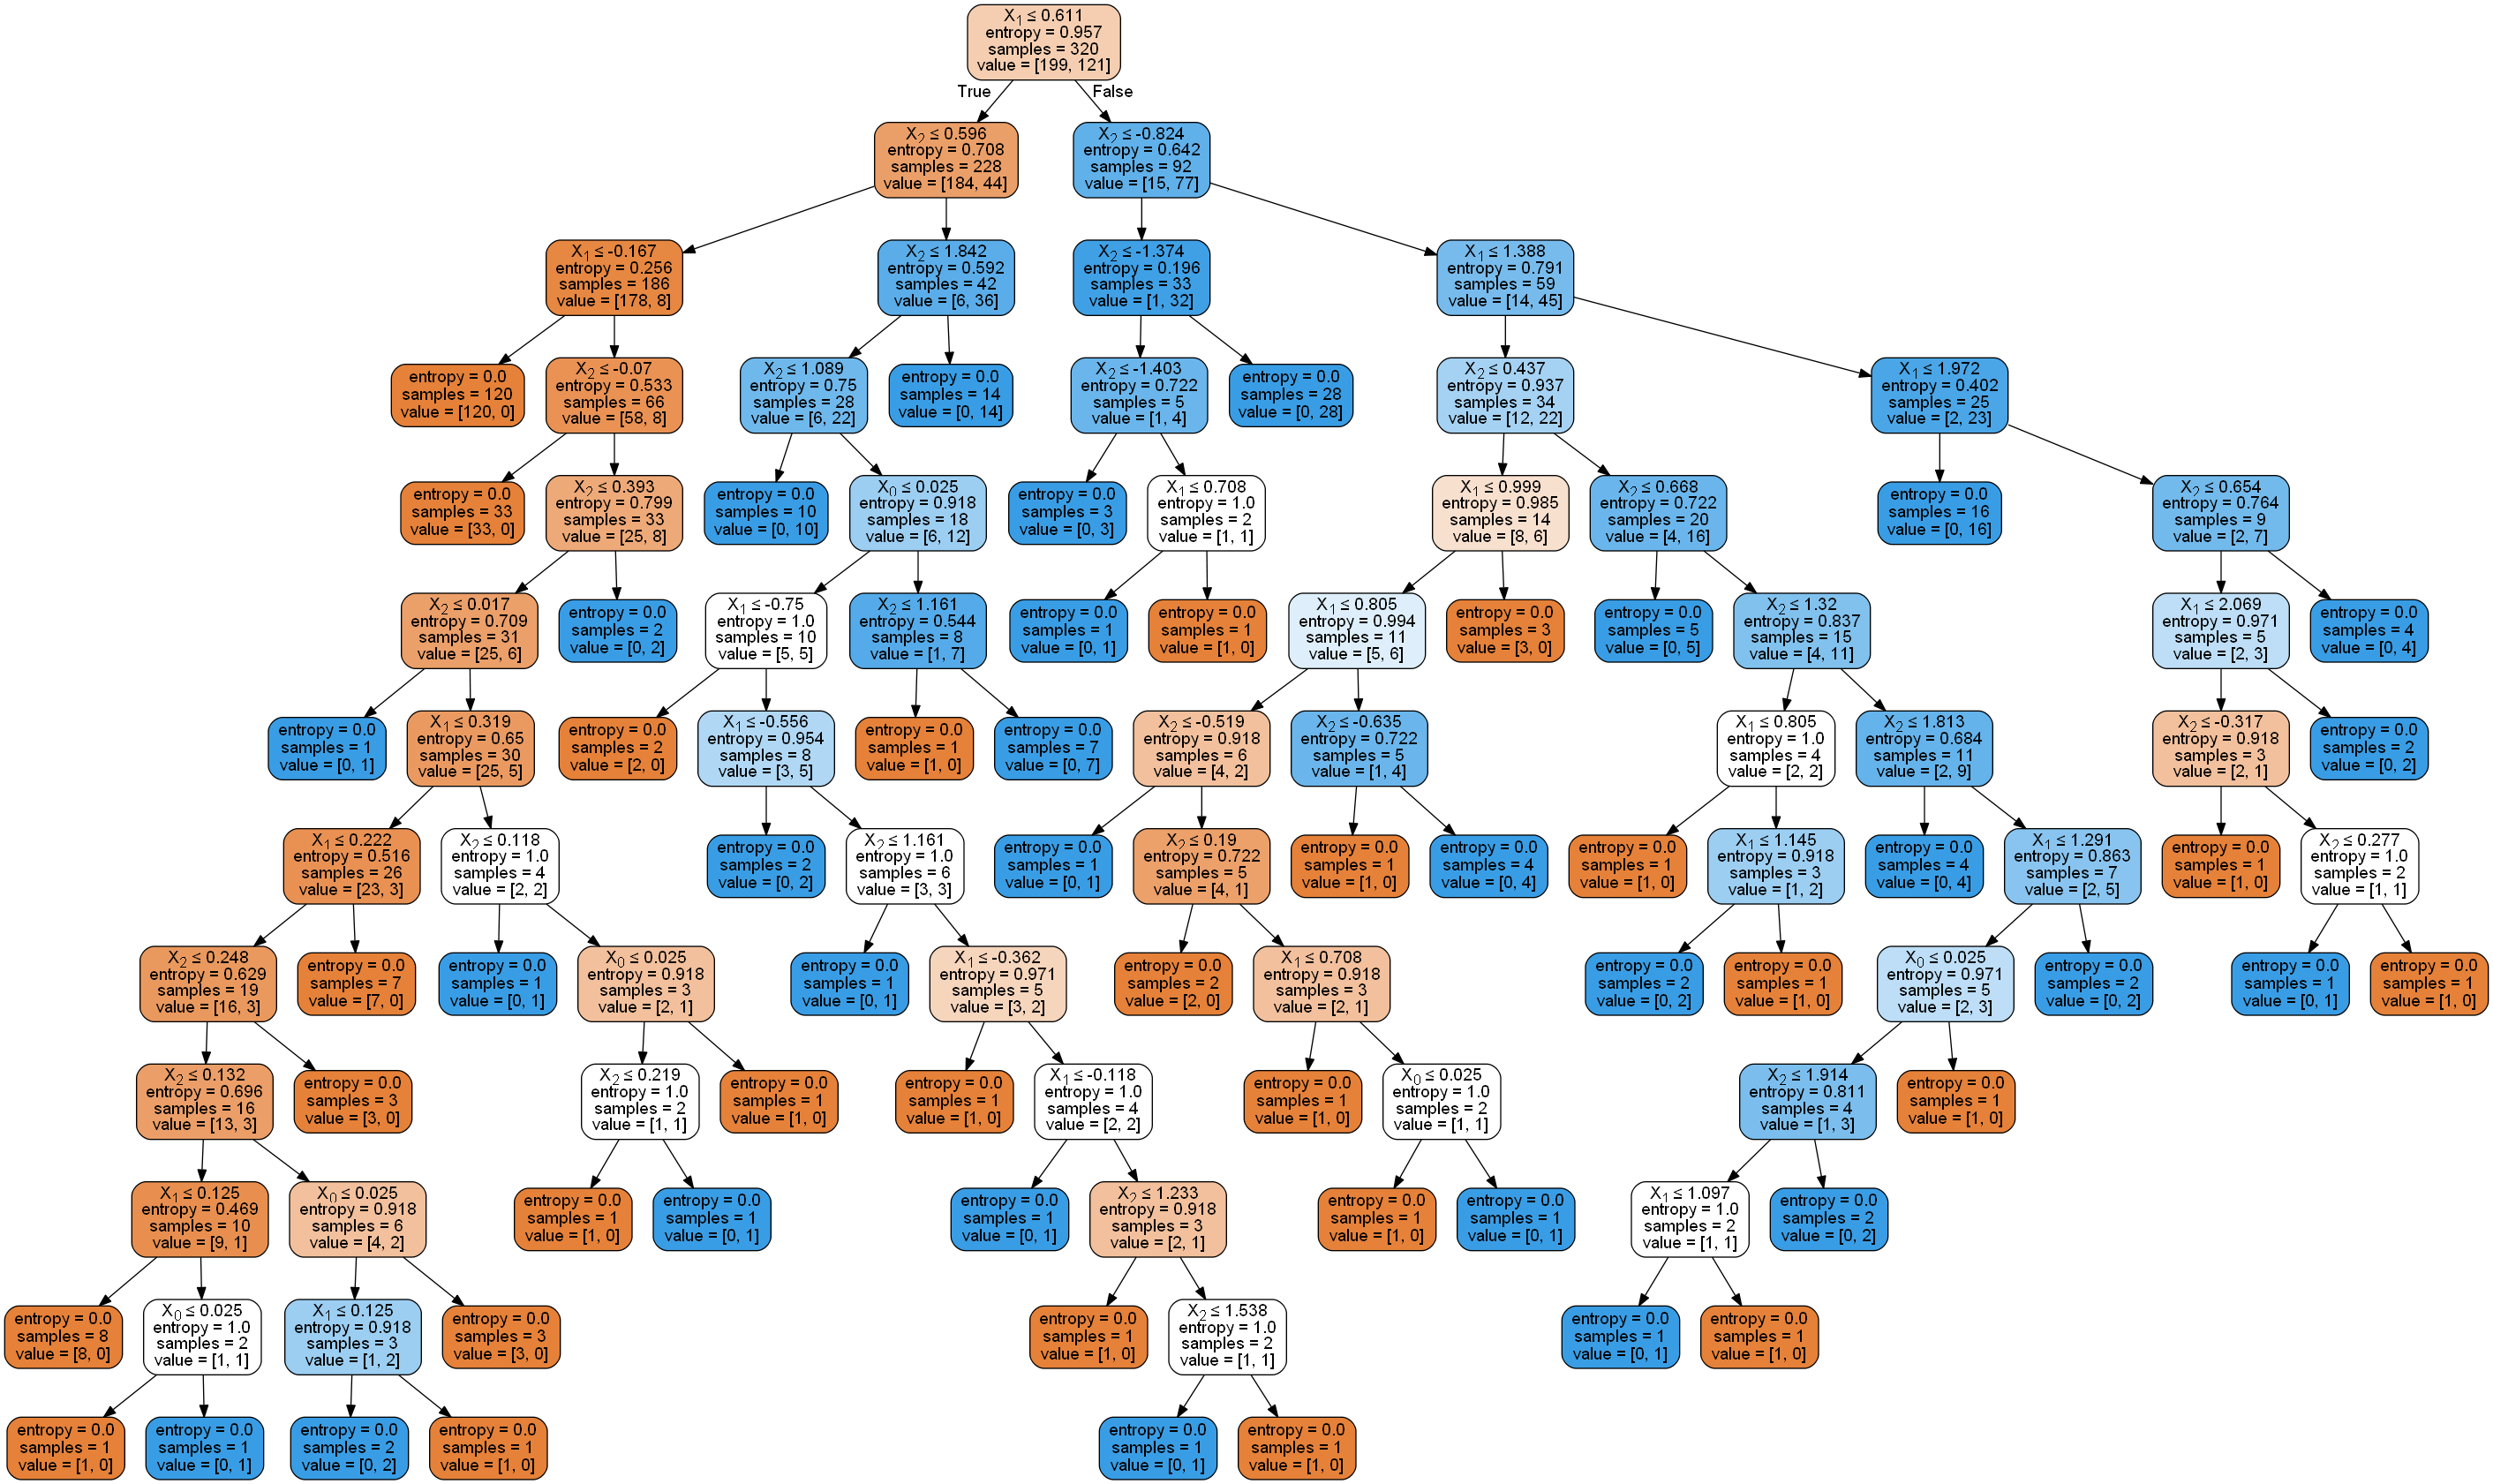

In [65]:
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(pipe[1], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())